Сроки сдачи лабораторных работ весна 2021/22 у.г.:
    
    Лабораторная работа 1 (разбор задания 1) - 17.02.22 и 19.02.22 - сдача до 17.03.22 и 19.03.22
    Лабораторная работа 2 (разбор задания 2) - 17.03.22 и 19.03.22 - сдача до 14.04.22 и 16.04.22 
    Лабораторная работа 3 (разбор задания 3) - 14.04.22 и 16.04.22 - сдача до 12.05.22 и 14.05.22
    Лабораторная работа 4 (разбор задания 4) - 12.05.22 и 14.05.22 - сдача до 9.06.22 и 11.06.22 
    

# Основы NumPy: тензоры и векторные вычисления. Функции активации

Данная лабораторная работа посвящена изучению основного пакета для численных расчетов в Python - [NumPy](https://numpy.org/). Несмотря на то, что пакет NumPy почти не содержит средств для моделирования и научных расчетов, понимание массивов NumPy и ориентированных на эти массивы вычислений поможет гораздо эффективнее использовать инструменты типа [pandas](https://pandas.pydata.org/). Основными аспектами NumPy для эффективной работы с большими массивами данных являются:
- хранение данных в непрерывном блоке памяти независимо от других встроенных объектов Python, что позволяет работать с этим блоком без проверки типов данных и других накладных расходов. Массивы NumPy занимают гораздо меньше памяти, чем встроенные в Python последовательности;
- сложные операции применяются к массивам целиком, так что циклы for не нужны.

**Цели лабораторной:**
- Научиться использовать iPython Notebooks
- Познакомиься с numpy-функциями и векторными вычислениями
- Понять механизм *укладывания* (broadcasting) массивов
- Научиться векторизировать вычисления

Давайте приступим!

## О работе с iPython Notebooks ##

iPython Notebooks - это интерактивный веб-блокнот (в руcскоязычной среде обычно переводят как блокнот, тетрадка, ноутбук), представляющий продуктивную среду для интерактивных исследовательских вычислений. В 2014 году веб-блокнот IPython превратился в Jupyter-блокнот, который ныне поддерживает более 40 языково-независимых средств интерактивных вычислений. 

В основном в каждом блокноте курса для создания заданий использовалось расширение nbgrader, автоматически создающее участки кода с заданием. Участки, требующие от Вас написания кода отмечены строчкой `### YOUR CODE HERE raise NotImplementedError()`. Напишите вместо этого ваш код и запустите его сочетанием клавиш "SHIFT"+"ENTER" или нажав "Run Cell" на панели инструментов. Вы не ограничены числом строчек для написания кода, однако старайтесь писать код максимально лаконично и с использованием только тех библиотек, что определены в начале всего блокнота. Например, при работе с массивами NumPy следует по возможности использовать встроенные векторизированные функции, а НЕ ПРИМЕНЯТЬ ЦИКЛЫ.

Часто после задания используются нередактируемые блоки проверки правильности выполнения, включающие в себя функции `assert`. Всегда выполняйте данные блоки! Несмотря на то, что их результаты не влияют на дельнейший код, они помогают в первую очередь Вам проверить свое решение, а также автоматически начисляют баллы за правильность в системе автоматизированной проверки.

Еще одним типом задания является развернутый ответ на вопрос, который следует писать в ячейке `YOUR ANSWER HERE`, где для написания текста следует пользоваться разметкой *[Markdown](https://www.markdownguide.org)*, а для формул - LaTeX: $\sum_{i=1}^n i^2$ (просто отделив LaTeX-выражение с помощью $-символов).

P.S. Кликните 2 раза левой кнопкой мыши на эту ячейку, чтобы посмотреть, как записывается формула в LaTeXе.

## Формальный нейрон ##

Искусственные нейронные сети появились в результате применения математического аппарата к исследованию функционирования нервной системы. Полученные при этом результаты успешно применяются при решении проблем распознавания образов, моделирования, прогнозирования, оптимизации и управления. 
Основной структурной и функциональной частью нейронной сети является **формальный нейрон (formal neuron)**, представленный на
рисунке, где $x_0,x_1,...,x_n$ – компоненты вектора входных сигналов (т.е. признаки объекта),
$w_0,w_1,...,w_n$ – значения весов входных сигналов нейрона, а $y$ – выходной сигнал нейрона:
<img src="./images/формальный_нейрон.png" title="Формальный нейрон" width="350">
Формальный нейрон состоит из элементов 3 типов: умножителей (синапсов), сумматора и преобразователя. Синапс характеризует силу (вес) связи между двумя нейронами. Сумматор выполняет сложение входных сигналов, предварительно помноженных на соответствующие веса. Преобразователь реализует функцию одного аргумента – выхода /сумматора. Эта функция называется **функцией активации** или **передаточной функцией нейрона**. Исходя из данного описания, математическая модель нейрона может быть представлена следующим образом: 
$$y=f(S),\\
S=\sum_{i=1}^n w_i x_i + b $$

Основной задачей обучения такого нейрона является настройка параметров $w_0,w_1,...,w_n$ таким образом, чтобы  в ответ на входные данные $x_0,x_1,...,x_n$ на выходе нейрон выдавал бы некоторое желаемое(целевое) значение $y_t$.

Мы рассмотрели модель одного нейрона. Нейронная сеть состоит из множества таких нейронов, объединенных в слои.


Литертура:
<br>- Спицын В.Г. Интеллектуальные системы: учебное пособие / В.Г. Спицын, Ю.Р. Цой; Томский политехнический университет. – Томск: Изд-во Томского политехнического университета, 2012. – 176 с.

Наиболее часто используемые функции активации представлены в таблице 1:

|Название|Формула|
|:--------------|:----------------------------------------------------------|
|Пороговая      |$$f(S)=\begin{cases} 0,S<\theta\\1,S\ge\theta \end{cases}$$|
|Линейная       |$$f(S)=aS$$                                                |
|Лог-сигмоидная (логистическая) |$$f(S) = \frac{1}{1+e^{-aS}}$$      
|Гиперболический<br>тангенс|$$f(S) = \frac{e^{aS}-e^{-aS}}{e^{aS}+e^{-aS}}$$|
|ReLU           |$$f(S)=\max(S,0)$$                                         |

## 1 - Базовые функции NumPy. Реализация функций активации ##

### 1.1 - Объект ndarray ###

Одна из ключевых особенностей NumPy - объект ndarray для представления N-мерного массива. Это быстрый и гибкий контейнер для хранения больших наборов данных в Python. Массивы позволяют выполнять математические операции над целыми блоками данных, применяя такой же синтаксис, как для соотвествующих операций над скалярами. 

В машинном обучении часто используется слово **тензор** - это контейнер для чисел. В терменологии тензоров *измерения* часто называют *осями*. Количество осей тензора называют его *рангом*.
Рассмотрим виды тензоров:
- тензор, содержащий единственное число, называется *скаляром*: `np.array(12)`
- тензор первого ранга - одномерный массив чисел, называют *вектором*: `np.array([12,5,6,20])`
- тензор второго ранга - массив векторов - это *матрица*: `np.array([[5,9],[6,3]])`
- тензор третьего и высшего ранга: `np.array([[[1,2],[3,4]],[[5,6],[7,8]]])`

Тензор определяется тремя ключевыми атрибутами:
- количество осей(ранг): `ndim` 
- форма - кортеж целых чисел, описывающих количество измерений на каждой оси тензора: `shape` 
- тип данных, содержащихся в тензоре: `dtype`

In [1]:
import numpy as np
x = np.array([[[1,2],[3,4],[5,6]],[[7,8],[9,10],[11,12]]])
print(x)
print("Ранг: ", x.ndim)
print("Форма: ", x.shape)
print("Тип данных: ", x.dtype)

[[[ 1  2]
  [ 3  4]
  [ 5  6]]

 [[ 7  8]
  [ 9 10]
  [11 12]]]
Ранг:  3
Форма:  (2, 3, 2)
Тип данных:  int32


### 1.2 - Сигмоидальная (лог-сигмоидная) функция активации ###

В данном задании Вам пригодится функция [np.exp()](https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.exp.html), вычисляющая экспоненту числа, однако до этого Вы использовали [math.exp()](https://docs.python.org/3/library/math.html). Для быстрого вызова документации по функции вы можете в отдельной ячейке кода вызвать команду без параметров и с ? знаком, например: `np.exp?`.

**Задание**: Реализуйте две сигмоидальные функции с помощью библиотек math и numpy, которые на вход принимают тензор x любого ранга и формы, и сравните их результаты.
$$ \text{Для } x \in \mathbb{R}^n \text{,     } sigmoid(x) = sigmoid\begin{pmatrix}
    x_1  \\
    x_2  \\
    ...  \\
    x_n  \\
\end{pmatrix} = \begin{pmatrix}
    \frac{1}{1+e^{-x_1}}  \\
    \frac{1}{1+e^{-x_2}}  \\
    ...  \\
    \frac{1}{1+e^{-x_n}}  \\
\end{pmatrix}\tag{1} $$

In [1]:
# Вычисление сигмоиды скалярного значения
import math
def basic_sigmoid(x):
    s = 1 / (1+math.exp(-x))
#    raise NotImplementedError()
    return s

In [2]:
assert round(basic_sigmoid(3), 2) == 0.95

Вычисление функции math.exp для вектора приведет к ошибке.

In [4]:
### Попробуйте вычислить результат для вектора ###
x = [1, 2, 3]
def basic_sigmoid(x):
    s = math.exp(x)
#    raise NotImplementedError()
    return s
basic_sigmoid(x)

TypeError: must be real number, not list

Библиотека numpy позволит провести вычисление функции для векторов. Реализуйте функцию sigmoid с использованием библиотеки numpy и функции numpy.exp.

In [5]:
# Реализуйте функцию sigmoid для вектора
import numpy as np

def sigmoid(x):    
    s = 1 / (1+np.exp(-x))
#    raise NotImplementedError()
    return s

In [6]:
x = np.array([1, 2, 3])
res = sigmoid(x)
assert round(res[0], 2) == 0.73 
assert round(res[1], 2) == 0.88
assert round(res[2], 2) == 0.95

### 1.3 - Производная сигмоидальной функции

Для обучения нейронной сети необходимо рассчитывать производную функции активации. Для выполнения дальнейших лабораторных работ Вам понадобится функция, вычисляющая производную сигмоидальной функции, в частности для оптимизации функции качества оценки модели методом обратного распространения ошибки.

<br>- Спицын В.Г. Интеллектуальные системы: учебное пособие / В.Г. Спицын, Ю.Р. Цой; Томский политехнический университет. – Томск: Изд-во Томского политехнического университета, 2012. – 176 с.

**Задание**: Реализуйте функцию sigmoid_grad(), вычисляющую первую производную сигмоидальной функции по входному зачению x: 
$$sigmoid\_derivative(x) = \sigma'(x) = \sigma(x) (1 - \sigma(x))\tag{2}$$

In [13]:
def sigmoid_derivative(x):
    ds = (1 / (1+np.exp(-x)))*(1 - (1 / (1+np.exp(-x))))
 #   raise NotImplementedError()
    
    return ds

In [14]:
x = np.array([1, 2, 3])
res = sigmoid_derivative(x) 
print ("sigmoid_derivative(x) = " + str(res))
assert round(res[0], 2) == 0.20 
assert round(res[1], 2) == 0.10
assert round(res[2], 3) == 0.045

sigmoid_derivative(x) = [0.19661193 0.10499359 0.04517666]


### 1.4 - Визуализация графиков функций активации ###

Понимание области значений и вида графика функции активации обязательно для дальнейшего изучения грамотного построения нейронных сетей. Приведем пример получения графика сигмоидальной функции активации.

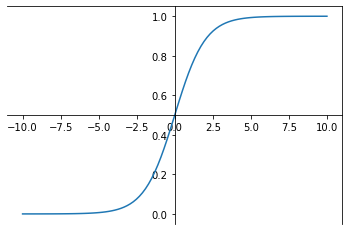

In [25]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):    
    s = 1 / (1+np.exp(-x))
#    raise NotImplementedError()
    return s

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
x = np.linspace(-10, 10, 100)
plt.plot(x, sigmoid(x))
plt.show()

**Задание**: Реализуте остальные 4 функции активации, визуализируйте их графики на одном plot с помощью [subplots](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots), а также скопируйте таблицу 1 в поле `YOUR ANSWER HERE` и дополните колонкой "Область значений", заполните ее.

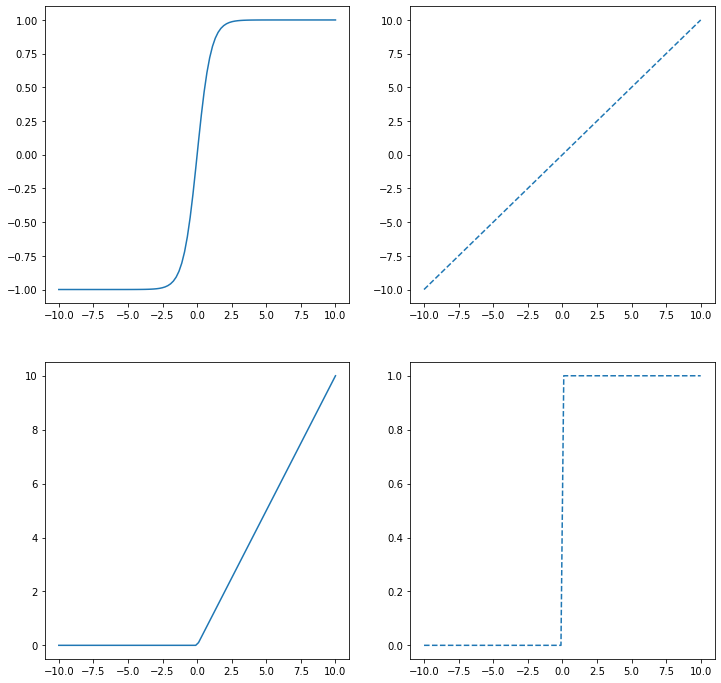

In [68]:
import matplotlib.pyplot as plt
import numpy as np
a = 1
def gtg(x):
#    raise NotImplementedError()
    return (np.exp(a*x) - np.exp(-a*x)) / (np.exp(a*x) + np.exp(-a*x))
def line(x):
    return a*x
def Max(x):
    return np.where(x < 0, 0, x)
def step(x):
    return np.where(x < 0, 0, 1)
                             
fig = plt.figure(figsize=(12, 12))
x = np.linspace(-10, 10, 100)
plt.subplot(2, 2, 1)
plt.plot(x, gtg(x))
plt.subplot(2, 2, 2)
plt.plot(x, line(x), '--')
plt.subplot(2, 2, 3)
plt.plot(x, Max(x))
plt.subplot(2, 2, 4)
plt.plot(x, step(x), '--')
plt.show()

Наиболее часто используемые функции активации представлены в таблице 1:

|Название|Формула|Область значений|
|:--------------|:----------------------------------------------------------|:-----------------------------|
|Пороговая      |$$f(S)=\begin{cases} 0,S<\theta\\1,S\ge\theta \end{cases}$$| $$S∈|R$$ $$f(S)=0or1$$ |
|Линейная       |$$f(S)=aS$$                                                | $$S,f(S)∈|R$$ |
|Лог-сигмоидная (логистическая) |$$f(S) = \frac{1}{1+e^{-aS}}$$             | $$S∈|R$$ $$f(S)∈(0;1)$$ |
|Гиперболический<br>тангенс|$$f(S) = \frac{e^{aS}-e^{-aS}}{e^{aS}+e^{-aS}}$$| $$S∈|R$$ $$f(S)∈(-1;1)$$ |
|ReLU           |$$f(S)=\max(S,0)$$                                         | $$S∈|R$$ $$f(S)∈[0;∞)$$ |

### 1.5 - Изменение формы массива ###

Во многих случаях изменить форму массива можно без копирования данных. Для этого следует передать кортеж с описанием новой формы методу экземпляра массива функции [np.reshape()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html).

Изменение формы с преобразованием в двумерный массив:
- порядок по строкам (как в С): старшие измерения обходятся *раньше* (т.е сначала обойти ось 1, а потом переходить к оси 0); 
- порядок по столбцам (как в Fortran): старшие измерения обходятся *позже* (т.е. сначала обойти ось 0, а потом переходить к оси 1).

<img src="images/reshape.png" style="width:500px;height:300;">
По умолчанию массивы NumPy размещаются в памяти *по строкам*.

Например, изображение формата RGB в компьютере представляет собой трехмерный массив формы $(ширина, высота, цвет = 3)$. Однако, для дальнейшей работы с изображениями Вам необходимо преобразовать их к форме $(ширина*высота*3, 1)$. Другими словами, Вы должны "развернуть", трехмерный массив в вектор значений.

<img src="images/image2vector.png" style="width:600px;">

**Задание**: Реализуйте функцию `image_to_vector()`, которая принимает на вход тензор формы $(ширина, высота, 3)$ и возвращает вектор данных формы $(ширина*высота*3, 1)$. Другими словами, измените форму тензора $v$ с $(a, b, c)$ на $(a*b*с,1)$.

In [4]:
import numpy as np
image = np.array([[[1,4,7]],[[2,5,8]],[[3,6,9]]])
def image_to_vector(image):
#    raise NotImplementedError()
    k = int(image.size)
    v = image.reshape(k,1)
    return v
print(v)

[[1]
 [4]
 [7]
 [2]
 [5]
 [8]
 [3]
 [6]
 [9]]


In [5]:
image = np.array([[[ 0.67826139,  0.29380381],
        [ 0.90714982,  0.52835647],
        [ 0.4215251 ,  0.45017551]],

       [[ 0.92814219,  0.96677647],
        [ 0.85304703,  0.52351845],
        [ 0.19981397,  0.27417313]],

       [[ 0.60659855,  0.00533165],
        [ 0.10820313,  0.49978937],
        [ 0.34144279,  0.94630077]]])
res = image_to_vector(image)
print ("image_to_vector(image) = " + str(res))

assert round(res[5,0], 2) == 0.45 
assert round(res[8,0], 2) == 0.85
assert round(res[2,0], 2) == 0.91

image_to_vector(image) = [[0.67826139]
 [0.29380381]
 [0.90714982]
 [0.52835647]
 [0.4215251 ]
 [0.45017551]
 [0.92814219]
 [0.96677647]
 [0.85304703]
 [0.52351845]
 [0.19981397]
 [0.27417313]
 [0.60659855]
 [0.00533165]
 [0.10820313]
 [0.49978937]
 [0.34144279]
 [0.94630077]]


**Задание**: какие две функции numpy используются для *линеаризации* - перехода от многомерного массива к одномерному массиву - и в чем их отличие? (показать на примере кода)

### 1.6 - Укладывание ####
Словом "укладывание" ([broadcasting](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html)) Описывается способ выполнения арифметических операций над массивами разной формы. Это очень мощный механизм, но даже опытные пользователи иногда испытывают затруднения с его пониманием. Простейший пример укладывания - комбинирование скалярного значения с массивом:

In [31]:
#Укладывание скалярного значения 4 на все элементы массива на основе умножения:
arr1 = np.arange(6)
print(arr1)
print(arr1 * 4)

[0 1 2 3 4 5]
[ 0  4  8 12 16 20]


**Правило укладывания**: Два массива совместимы по укладыванию, если для обоих *последних измерений* (т.е. отсчитываемых с конца) длины осей совпадают или хотя бы одна длина равна 1. Тогда укладывание производится по отсутствующим измерениям или по измерениям длины 1. 

Укладывание одномерного массива по оси 0:
<img src="./images/укладывание_1.png" title="Укладывание одномерного массива по оси 0" width="75%">

In [32]:
arr1 = np.arange(4).repeat(3)
print('init arr1:\n',arr1)
arr1 = arr1.reshape(4,3)
print('arr1 reshaped (4,3):\n',arr1)
arr2 = np.arange(1,4)
print('arr2:\n',arr2)
print('arr + arr2:\n',arr1 + arr2)

init arr1:
 [0 0 0 1 1 1 2 2 2 3 3 3]
arr1 reshaped (4,3):
 [[0 0 0]
 [1 1 1]
 [2 2 2]
 [3 3 3]]
arr2:
 [1 2 3]
arr + arr2:
 [[1 2 3]
 [2 3 4]
 [3 4 5]
 [4 5 6]]


Укладывание одномерного массива по оси 1:
<img src="./images/укладывание_2.png" title="Укладывание одномерного массива по оси 1" width="75%">

In [33]:
arr2 = np.arange(1,5)
arr2 = arr2.reshape(4,1)
print('arr1:\n',arr1)
print('arr2:\n',arr2)
print('arr1 + arr2:\n',arr1 + arr2)

arr1:
 [[0 0 0]
 [1 1 1]
 [2 2 2]
 [3 3 3]]
arr2:
 [[1]
 [2]
 [3]
 [4]]
arr1 + arr2:
 [[1 1 1]
 [3 3 3]
 [5 5 5]
 [7 7 7]]


В трехмерном случае укладываниепо любому из трех измерений сводится к изменению формы данных для обеспечения совместимости массивов. На рисунке наглядно показано, каковы должны быть формы для укладывания по любой оси трехмерного массива.
Укладывание двумерного массива в трехмерный массив:
<img src="./images/укладывание_4.png" title="Укладывание двумерного массива в трехмерный массив" width="65%">

In [144]:
arr1 = np.arange(0,120)
arr1 = arr1.reshape(8,5,3)
print('arr1:\n',arr1)
arr2 = np.arange(1,16)
arr2 = arr2.reshape(1,5,3)
print('arr2:\n',arr2)
arr3 = arr1 + arr2
print('arr1 + arr2:\n',arr3)
print('check: arr3 - arr1:\n',arr3 - arr1)    # проверка правильности укладывания

arr1:
 [[[  0   1   2]
  [  3   4   5]
  [  6   7   8]
  [  9  10  11]
  [ 12  13  14]]

 [[ 15  16  17]
  [ 18  19  20]
  [ 21  22  23]
  [ 24  25  26]
  [ 27  28  29]]

 [[ 30  31  32]
  [ 33  34  35]
  [ 36  37  38]
  [ 39  40  41]
  [ 42  43  44]]

 [[ 45  46  47]
  [ 48  49  50]
  [ 51  52  53]
  [ 54  55  56]
  [ 57  58  59]]

 [[ 60  61  62]
  [ 63  64  65]
  [ 66  67  68]
  [ 69  70  71]
  [ 72  73  74]]

 [[ 75  76  77]
  [ 78  79  80]
  [ 81  82  83]
  [ 84  85  86]
  [ 87  88  89]]

 [[ 90  91  92]
  [ 93  94  95]
  [ 96  97  98]
  [ 99 100 101]
  [102 103 104]]

 [[105 106 107]
  [108 109 110]
  [111 112 113]
  [114 115 116]
  [117 118 119]]]
arr2:
 [[[ 1  2  3]
  [ 4  5  6]
  [ 7  8  9]
  [10 11 12]
  [13 14 15]]]
arr1 + arr2:
 [[[  1   3   5]
  [  7   9  11]
  [ 13  15  17]
  [ 19  21  23]
  [ 25  27  29]]

 [[ 16  18  20]
  [ 22  24  26]
  [ 28  30  32]
  [ 34  36  38]
  [ 40  42  44]]

 [[ 31  33  35]
  [ 37  39  41]
  [ 43  45  47]
  [ 49  51  53]
  [ 55  57  59]]

 [[

**Задание**: сделайте укладывание по остальным 2-м измерениям трехмерного тензора.

In [146]:
# ось 1
arr1 = np.arange(0,120)
arr1 = arr1.reshape(8,5,3)
print('arr1:\n',arr1)
arr2 = np.arange(1,25)
arr2 = arr2.reshape(8,1,3)
print('arr2:\n',arr2)
arr3 = arr1 + arr2
print('arr1 + arr2:\n',arr3)
print('check: arr3 - arr1:\n',arr3 - arr1)    # проверка правильности укладывания

arr1:
 [[[  0   1   2]
  [  3   4   5]
  [  6   7   8]
  [  9  10  11]
  [ 12  13  14]]

 [[ 15  16  17]
  [ 18  19  20]
  [ 21  22  23]
  [ 24  25  26]
  [ 27  28  29]]

 [[ 30  31  32]
  [ 33  34  35]
  [ 36  37  38]
  [ 39  40  41]
  [ 42  43  44]]

 [[ 45  46  47]
  [ 48  49  50]
  [ 51  52  53]
  [ 54  55  56]
  [ 57  58  59]]

 [[ 60  61  62]
  [ 63  64  65]
  [ 66  67  68]
  [ 69  70  71]
  [ 72  73  74]]

 [[ 75  76  77]
  [ 78  79  80]
  [ 81  82  83]
  [ 84  85  86]
  [ 87  88  89]]

 [[ 90  91  92]
  [ 93  94  95]
  [ 96  97  98]
  [ 99 100 101]
  [102 103 104]]

 [[105 106 107]
  [108 109 110]
  [111 112 113]
  [114 115 116]
  [117 118 119]]]
arr2:
 [[[ 1  2  3]]

 [[ 4  5  6]]

 [[ 7  8  9]]

 [[10 11 12]]

 [[13 14 15]]

 [[16 17 18]]

 [[19 20 21]]

 [[22 23 24]]]
arr1 + arr2:
 [[[  1   3   5]
  [  4   6   8]
  [  7   9  11]
  [ 10  12  14]
  [ 13  15  17]]

 [[ 19  21  23]
  [ 22  24  26]
  [ 25  27  29]
  [ 28  30  32]
  [ 31  33  35]]

 [[ 37  39  41]
  [ 40  42  44]


In [147]:
# ось 2
arr1 = np.arange(0,120)
arr1 = arr1.reshape(8,5,3)
print('arr1:\n',arr1)
arr2 = np.arange(1,41)
arr2 = arr2.reshape(8,5,1)
print('arr2:\n',arr2)
arr3 = arr1 + arr2
print('arr1 + arr2:\n',arr3)
print('check: arr3 - arr1:\n',arr3 - arr1)    # проверка правильности укладывания

arr1:
 [[[  0   1   2]
  [  3   4   5]
  [  6   7   8]
  [  9  10  11]
  [ 12  13  14]]

 [[ 15  16  17]
  [ 18  19  20]
  [ 21  22  23]
  [ 24  25  26]
  [ 27  28  29]]

 [[ 30  31  32]
  [ 33  34  35]
  [ 36  37  38]
  [ 39  40  41]
  [ 42  43  44]]

 [[ 45  46  47]
  [ 48  49  50]
  [ 51  52  53]
  [ 54  55  56]
  [ 57  58  59]]

 [[ 60  61  62]
  [ 63  64  65]
  [ 66  67  68]
  [ 69  70  71]
  [ 72  73  74]]

 [[ 75  76  77]
  [ 78  79  80]
  [ 81  82  83]
  [ 84  85  86]
  [ 87  88  89]]

 [[ 90  91  92]
  [ 93  94  95]
  [ 96  97  98]
  [ 99 100 101]
  [102 103 104]]

 [[105 106 107]
  [108 109 110]
  [111 112 113]
  [114 115 116]
  [117 118 119]]]
arr2:
 [[[ 1]
  [ 2]
  [ 3]
  [ 4]
  [ 5]]

 [[ 6]
  [ 7]
  [ 8]
  [ 9]
  [10]]

 [[11]
  [12]
  [13]
  [14]
  [15]]

 [[16]
  [17]
  [18]
  [19]
  [20]]

 [[21]
  [22]
  [23]
  [24]
  [25]]

 [[26]
  [27]
  [28]
  [29]
  [30]]

 [[31]
  [32]
  [33]
  [34]
  [35]]

 [[36]
  [37]
  [38]
  [39]
  [40]]]
arr1 + arr2:
 [[[  1   2   3]
  [ 

 У **логистической (сигмоидальной) функции**  $f(S) = \frac{1}{1+e^{-aS}}$ есть физический смысл: она моделирует кривую роста вероятности некоего события, по мере изменения управляющих параметров (факторов риска).

Функция **Softmax** — это обобщение логистической функции для многомерного случая. Функция преобразует вектор ${\displaystyle z}$ размерности ${\displaystyle K}$ в вектор ${\displaystyle \sigma }$  той же размерности, где каждая координата ${\displaystyle \sigma _{i}}$ полученного вектора представлена вещественным числом в интервале [0,1] и сумма координат равна 1.

Данную функцию применяют не к отдельному значению, а к вектору. Функция Softmax применяется в машинном обучении для задач классификации, когда количество возможных классов больше двух (для двух классов используется логистическая функция). Координаты ${\displaystyle \sigma _{i}}$ полученного вектора при этом трактуются как вероятности того, что объект принадлежит к классу ${\displaystyle i}$.

$ softmax(z)_i = \frac{e^{z_i}}{\sum_{k=1}^K e^{z_k}} $
- $ \text{для } x \in \mathbb{R}^{1\times n} \text{,     } softmax(x) = softmax(\begin{bmatrix}
    x_1  &&
    x_2 &&
    ...  &&
    x_n  
\end{bmatrix}) = \begin{bmatrix}
     \frac{e^{x_1}}{\sum_{j}e^{x_j}}  &&
    \frac{e^{x_2}}{\sum_{j}e^{x_j}}  &&
    ...  &&
    \frac{e^{x_n}}{\sum_{j}e^{x_j}} 
\end{bmatrix} $ 

- $\text{для массива } x \in \mathbb{R}^{m \times n} \text{, где  $x_{ij}$ - это элемент i-й строки и j-го столбца матрицы $x$: }$  $$softmax(x) = softmax\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\
    x_{21} & x_{22} & x_{23} & \dots  & x_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{m1} & x_{m2} & x_{m3} & \dots  & x_{mn}
\end{bmatrix} = \begin{bmatrix}
    \frac{e^{x_{11}}}{\sum_{j}e^{x_{1j}}} & \frac{e^{x_{12}}}{\sum_{j}e^{x_{1j}}} & \frac{e^{x_{13}}}{\sum_{j}e^{x_{1j}}} & \dots  & \frac{e^{x_{1n}}}{\sum_{j}e^{x_{1j}}} \\
    \frac{e^{x_{21}}}{\sum_{j}e^{x_{2j}}} & \frac{e^{x_{22}}}{\sum_{j}e^{x_{2j}}} & \frac{e^{x_{23}}}{\sum_{j}e^{x_{2j}}} & \dots  & \frac{e^{x_{2n}}}{\sum_{j}e^{x_{2j}}} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    \frac{e^{x_{m1}}}{\sum_{j}e^{x_{mj}}} & \frac{e^{x_{m2}}}{\sum_{j}e^{x_{mj}}} & \frac{e^{x_{m3}}}{\sum_{j}e^{x_{mj}}} & \dots  & \frac{e^{x_{mn}}}{\sum_{j}e^{x_{mj}}}
\end{bmatrix} = \begin{pmatrix}
    softmax\text{(first row of x)}  \\
    softmax\text{(second row of x)} \\
    ...  \\
    softmax\text{(last row of x)} \\
\end{pmatrix} $$

**Задание**: Реализуйте функцию softmax с помощью numpy c применением укладывания массивов. 

In [38]:
import numpy as np
x = np.array([[1,2,3],[4,5,6]])
def softmax(x):
    """Вычисление функции softmax для каждой строки массива x (m,n). """
    m = int(x.ndim)
    x = np.exp(x)
    s = x / np.sum(x, axis = 1).reshape(m,1)
#    raise NotImplementedError()
    return s

In [39]:
x = np.array([
    [9, 2, 5, 0, 0],
    [7, 5, 0, 0 ,0]])
res = softmax(x)
print("softmax(x) = " + str(res))

assert round(res[1,0], 2) == 0.88 
assert round(res[0,3], 5) == 0.00012
assert round(res[0,0], 2) == 0.98

softmax(x) = [[9.80897665e-01 8.94462891e-04 1.79657674e-02 1.21052389e-04
  1.21052389e-04]
 [8.78679856e-01 1.18916387e-01 8.01252314e-04 8.01252314e-04
  8.01252314e-04]]


### 1.7 - Нормализация строк

Было бы проблематично передать в нейронную сеть значения, имеющие самые разные диапазоны. Например, если вы хотите прогнозировать погоду, то вам неободимо учитывать такие данные, как текущий месяц, день, влажность, атмосферное давление, время суток и т.д. Сеть, конечно, сможет автоматически адаптироваться к таким разнородным данным, однако это усложнит процесс обучения. На практике к таким данным принято применять нормализацию. 

Целью нормализации значений является преобразование данных к виду, который наиболее подходит для обработки, т.е. данные, поступающие на вход, должны иметь числовой тип, а их значения должны быть распределены в определенном диапазоне. 

На практике наиболее распространены следующие методы нормализации признаков:
- **минимакс**, линейное преобразование данных в диапазоне \[0..1\], где минимальное и максимальное масштабируемые значения соответствуют 0 и 1 соответственно: $$x_{norm}=\frac{x-x_{min}}{x_{max}+x_{min}}\tag{3}$$ 
- **Z-масштабирование**, для каждого признака во входных данных из каждого значения вычитается среднее по этому признаку $\mu$, и разность делится на стандартное отклонение $\sigma$, в результате признак центрируется по нулевому значению и имеет стандартное отклонение, равное единице: $$x_{norm}=\frac{x-\mu}{\sigma}\tag{4}$$
- **масштабирование векторов данных на основе нормы вектора** $$ x_{norm}=\frac{x}{\| x\|}\tag{5}$$

Рассмотрим нормализацию путем деления векторов (строчек) данных на норму.
Например, если $$x = 
\begin{bmatrix}
    0 & 3 & 4 \\
    2 & 6 & 4 \\
\end{bmatrix}\tag{6}$$ тогда норма$$\| x\| = np.linalg.norm(x, axis = 1, keepdims = True) = \begin{bmatrix}
    5 \\
    \sqrt{56} \\
\end{bmatrix}\tag{7} $$и        $$ x\_normalized = \frac{x}{\| x\|} = \begin{bmatrix}
    0 & \frac{3}{5} & \frac{4}{5} \\
    \frac{2}{\sqrt{56}} & \frac{6}{\sqrt{56}} & \frac{4}{\sqrt{56}} \\
\end{bmatrix}\tag{8}$$ 

**Задание**: Реализуте функцию normalize() для масштабирования строк матрицы x. 

In [40]:
import numpy as np
def normalize(x):
    norma = np.linalg.norm(x, axis = 1, keepdims =  True)
    x = x/norma
#    raise NotImplementedError()

    return x

In [41]:
x = np.array([
    [0, 3, 4],
    [1, 6, 4]])
res = normalize(x)
print("normalize(x) = " + str(res))
assert res[0,1] == 0.6 
assert round(res[1,1], 2) == 0.82
assert res[0,2] == 0.8

normalize(x) = [[0.         0.6        0.8       ]
 [0.13736056 0.82416338 0.54944226]]


## 2. Векторизация

В области глубокого обучения часто приходится работать с огромными массивами данных. Поэтому неоптимальная в вычислительном отношении функция может стать узким местом в вашем алгоритме и привести к существенному увеличению времени работы модели. Для написания эффективного в вычислительном отношении кода мы будем использовать *векторизацию*. 

**Задание:** Постарайтесь определить разницу между следующими функциями умножения матриц. Реализуйте по аналогии эти функции с помощью векторизированных функций Numpy. Сделайте вывод.

In [4]:
import time
import numpy as np

x1 = [4, 2, 5, 7, 0, 8, 5, 0, 7, 0, 9, 2, 5, 1, 0]
x2 = [9, 2, 3, 9, 0, 9, 2, 5, 0, 0, 3, 2, 5, 0, 1]

### Cкалярное произведение векторов ###
tic = time.process_time()
dot = 0
for i in range(len(x1)):
    dot+= x1[i]*x2[i]
toc = time.process_time()
print ("dot = " + str(dot) + "\n ----- Время вычисления = " + str(1000*(toc - tic)) + "мс")

### Внешнее произведение двух векторов ###
tic = time.process_time()
outer = np.zeros((len(x1),len(x2)))
for i in range(len(x1)):
    for j in range(len(x2)):
        outer[i,j] = x1[i]*x2[j]
toc = time.process_time()
print ("outer = " + str(outer) + "\n ----- Время вычисления = " + str(1000*(toc - tic)) + "мс")

### Поэлементное уможение векторов ###
tic = time.process_time()
mul = np.zeros(len(x1))
for i in range(len(x1)):
    mul[i] = x1[i]*x2[i]
toc = time.process_time()
print ("elementwise multiplication = " + str(mul) + "\n ----- Время вычисления = " + str(1000*(toc - tic)) + "мс")

### Матричное умножение ###
W = np.random.rand(6,len(x1))
tic = time.process_time()
gdot = np.zeros(W.shape[0])
for i in range(W.shape[0]):
    for j in range(len(x1)):
        gdot[i] += W[i,j]*x1[j]
toc = time.process_time()
print ("gdot = " + str(gdot) + "\n ----- Время вычисления = " + str(1000*(toc - tic)) + "мс")

dot = 256
 ----- Время вычисления = 0.0мс
outer = [[36.  8. 12. 36.  0. 36.  8. 20.  0.  0. 12.  8. 20.  0.  4.]
 [18.  4.  6. 18.  0. 18.  4. 10.  0.  0.  6.  4. 10.  0.  2.]
 [45. 10. 15. 45.  0. 45. 10. 25.  0.  0. 15. 10. 25.  0.  5.]
 [63. 14. 21. 63.  0. 63. 14. 35.  0.  0. 21. 14. 35.  0.  7.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [72. 16. 24. 72.  0. 72. 16. 40.  0.  0. 24. 16. 40.  0.  8.]
 [45. 10. 15. 45.  0. 45. 10. 25.  0.  0. 15. 10. 25.  0.  5.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [63. 14. 21. 63.  0. 63. 14. 35.  0.  0. 21. 14. 35.  0.  7.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [81. 18. 27. 81.  0. 81. 18. 45.  0.  0. 27. 18. 45.  0.  9.]
 [18.  4.  6. 18.  0. 18.  4. 10.  0.  0.  6.  4. 10.  0.  2.]
 [45. 10. 15. 45.  0. 45. 10. 25.  0.  0. 15. 10. 25.  0.  5.]
 [ 9.  2.  3.  9.  0.  9.  2.  5.  0.  0.  3.  2.  5.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
 ---

In [54]:
import numpy as np
import time
x1 = np.array([4, 2, 5, 7, 0, 8, 5, 0, 7, 0, 9, 2, 5, 1, 0])
x2 = np.array([9, 2, 3, 9, 0, 9, 2, 5, 0, 0, 3, 2, 5, 0, 1])

### Cкалярное произведение векторов ###
tic = time.process_time()
dot = np.dot(x1, x2)
toc = time.process_time()
print ("dot = " + str(dot) + "\n ----- Время вычисления = " + str(1000*(toc - tic)) + "мс")

### Внешнее произведение двух векторов ###
tic = time.process_time()
outer = np.outer(x1,x2)
toc = time.process_time()
print ("outer = " + str(outer) + "\n ----- Время вычисления = " + str(1000*(toc - tic)) + "мс")
toc = time.process_time()

### Поэлементное уможение векторов ###
tic = time.process_time()
mul = x1*x2
toc = time.process_time()
print ("elementwise multiplication = " + str(mul) + "\n ----- Время вычисления = " + str(1000*(toc - tic)) + "мс")

### Матричное умножение ###
W = np.random.rand(6,len(x1))
gdot = np.matmul(W,x1)
toc = time.process_time()
print ("gdot = " + str(gdot) + "\n ----- Время вычисления = " + str(1000*(toc - tic)) + "мс")
#raise NotImplementedError()

dot = 256
 ----- Время вычисления = 0.0мс
outer = [[36  8 12 36  0 36  8 20  0  0 12  8 20  0  4]
 [18  4  6 18  0 18  4 10  0  0  6  4 10  0  2]
 [45 10 15 45  0 45 10 25  0  0 15 10 25  0  5]
 [63 14 21 63  0 63 14 35  0  0 21 14 35  0  7]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [72 16 24 72  0 72 16 40  0  0 24 16 40  0  8]
 [45 10 15 45  0 45 10 25  0  0 15 10 25  0  5]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [63 14 21 63  0 63 14 35  0  0 21 14 35  0  7]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [81 18 27 81  0 81 18 45  0  0 27 18 45  0  9]
 [18  4  6 18  0 18  4 10  0  0  6  4 10  0  2]
 [45 10 15 45  0 45 10 25  0  0 15 10 25  0  5]
 [ 9  2  3  9  0  9  2  5  0  0  3  2  5  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]
 ----- Время вычисления = 0.0мс
elementwise multiplication = [36  4 15 63  0 72 10  0  0  0 27  4 25  0  0]
 ----- Время вычисления = 0.0мс
gdot = [31.786587   22.5878236  32.90602726 37.36947106 25.61275213 28.74479632]
 ----- В

Задание: для закрепления полученных знаний о библиотеке numpy реализуйте с ее помощью выражения из файла "Варианты.pdf" согласно вашему варианту.

In [11]:
import numpy as np
z = []
y = []
x = []
print('Введите n')
n = int(input())
print('Введите x')
for i in range(n):
    x.append(int(input()))
print(x)
print('Введите y')
for i in range(n):
    y.append(int(input()))
print(y)
print('Введите z')
for i in range(n):
    z.append(int(input()))
print(z)
def b(x,y,z):
    return (3 + np.exp(y-1))/(1 + x ** 2 * np.absolute(y - np.tan(z)))
vb = np.vectorize(b)
print(vb(x,y,z))
#raise NotImplementedError()

Введите n
2
Введите x
1
2
[1, 2]
Введите y
3
4
[3, 4]
Введите z
5
6
[5, 6]
[1.40763295 1.27094833]


In [1]:

import numpy as np
y = []
x = []
print('Введите n')
n = int(input())
print('Введите x')
for i in range(n):
    x.append(int(input()))
print(x)
print('Введите y')
for i in range(n):
    y.append(int(input()))
print(y)
def b(x,y):
    if (y == 0):
        return 0
    else: 
        if (x == 0):
            return abs(x ** 2 + y ** 0.5)
        else:
            if (x-y > 0):
                return np.sin(x+y) + 2*(x+y) ** 2
            else:
                return np.sin(x-y) + 2*(x-y) ** 3
vb = np.vectorize(b)
print(vb(x,y))

Введите n
2
Введите x
1
2
[1, 2]
Введите y
2
1
[2, 1]
[-2.84147098 18.14112001]


Контрольные вопросы:
1. Описать работу формального нейрона?
Поступает множество входных сигналов, которые имеют определенные значения веса в сумматор,
который в свою очередь перемножает соотвествующие веса и сигналы и складывает. Итоговая сумма
поступает в преобразователь, который реализует функцию активании. Основная задача обучения нейрона - 
подбор весов для получения желаемого значения функции активации.
2. Что такое тензор. Какие бывают тензоры?
Тензор - это контейнер чисел. Тензоры подразделяются на скаляры, векторы, матрицы, и тензоры высшего порядка
Тензор определяется 3 ключевыми атрибутами: количество осей, форма(shape), тип данных тензора
3. Что такое функция активации и какова ее задача?
Функция активации - это функция одного аргумента, выходящая из преобразователя формального нейрона.
Основная задача обучения нейрона - 
подбор весов для получения желаемого значения функции активации.
4. Какие бывают функции активации? В чем их отличие друг от друга?
Самые различные. Наиболее популярные - пороговая, линейная, лог-сигмоидная, гиперболический 
тангенс. Основное отличие - это разные требования к нейрону(разные графиик, области значений)
5. Для чего необходимо рассчитывать производную функции активации?
В основном для обучения нейронной сети, в частности - оптимизация функции качества оценки модели
методом обратного распространения ошибки.
6. Для чего нужно укладывание? Сформулируйте правило укладывания.
Это способ выполнения арифметических операций над массивами разной формы. Для того, чтобы 
провести операцию укладывания необходимо, чтобы длины осей совпадали(таким образом подобрать ось 
или тензор для укладывания).
7. Что представляет собой функцияи softmax?
Функция Softmax — это обобщение логистической функции для многомерного случая. Функция преобразует 
вектор в другой вектор, содержащий значения в интервале от 0 до 1, а сумма координат веткора = 1.
Softmax применяется в машинном обучении для задач классификации, когда количество возможных классов 
больше двух (для двух классов используется логистическая функция)
8. Зачем нужна процедура нормализации? Какие существуют методы нормализации данных?
Целью нормализации значений является преобразование данных к виду, который наиболее подходит для 
обработки, т.е. данные, поступающие на вход, должны иметь числовой тип, а их значения должны быть 
распределены в определенном диапазоне. Основные методы - это минимакс, Z-масштабирование, по но
9. Зачем нужна процедура векторизации?
Данная процедура необходима для работы с неограниченным количеством массивов или объектов.

<font color='blue'>
Источники литературы для успешного выполнения лабораторной работы:
<br>-  Шолле Ф.Глубокое обучение на Python / Ф. Шолле – СПб.: Питер, 2018.–
400c.
<br>- Маккини У. Python И анализ данных / пер. с анг. А.А. Слинкина. - М.: ДМК Пресс, 2020. - 540 с.: ил. [Лань: доступ через ЭБС НТБ]
<br>- Спицын В.Г. Интеллектуальные системы: учебное пособие / В.Г. Спицын, Ю.Р. Цой; Томский политехнический университет. – Томск: Изд-во Томского политехнического университета, 2012. – 176 с.